In [25]:
import pandas as pd
import string

#for machine learning - classification
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#for visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

# fro NLP

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...


True

In [26]:
df1 = pd.read_csv('youtube/Youtube01-Psy.csv')
df2 = pd.read_csv('youtube/Youtube02-KatyPerry.csv')
df3 = pd.read_csv('youtube/Youtube03-LMFAO.csv')
df4 = pd.read_csv('youtube/Youtube04-Eminem.csv')
df5 = pd.read_csv('youtube/Youtube05-Shakira.csv')

df = pd.concat([df1, df2, df3, df4, df5])
df = df[['CONTENT', 'CLASS']].copy()
df.CLASS.value_counts()




CLASS
1    1005
0     951
Name: count, dtype: int64

In [27]:
df.sample(5)

,CONTENT,CLASS
34,"Hello! I'm Marian, I'm a singer from Venezuela...",1
376,Check out this video on YouTube:﻿,1
50,Plz subscribe to my channel and I will subscri...,1
202,I wish that guy wasn&#39;t so protective geeze﻿,0
250,why are they 5million comments when there is o...,0


In [28]:
phrase = 'J\'ai BEACOUP mangé!'
phrase.lower()

"j'ai beacoup mangé!"

In [29]:
print(word_tokenize('I would like an orange juice, and a sandwich!'))

['I', 'would', 'like', 'an', 'orange', 'juice', ',', 'and', 'a', 'sandwich', '!']


In [30]:
stopW = stopwords.words('english')
print('Il y a {} stopwords'.format(len(stopW)))
print('Les 10 premiers sont {}'.format(stopW[:10]))

Il y a 179 stopwords
Les 10 premiers sont ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [31]:
exclude = set(string.punctuation)
tokens = word_tokenize('I would like an orange juice, and a sandwich!')
print('input tokens: {}'.format(tokens))
stopW.extend(exclude)
tokens_without_stopW = [word for word in tokens if word not in stopW]
print('output tokens: {}'.format(tokens_without_stopW))

input tokens: ['I', 'would', 'like', 'an', 'orange', 'juice', ',', 'and', 'a', 'sandwich', '!']
output tokens: ['I', 'would', 'like', 'orange', 'juice', 'sandwich']


In [33]:
lemma = WordNetLemmatizer()
text = word_tokenize('The girls wanted to play with their parents')
[lemma.lemmatize(word) for word in text]                          

['The', 'girl', 'wanted', 'to', 'play', 'with', 'their', 'parent']

In [34]:
lemma = WordNetLemmatizer()
text = word_tokenize('The girls wanted to play with their parents')
[lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(word, pos='a'),pos='v'),pos='n') for word in text ]     

['The', 'girl', 'want', 'to', 'play', 'with', 'their', 'parent']

In [35]:
def lemmatize(sent):
    tokens = word_tokenize(sent.lower())
    tokens = [lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(w, pos='v'),pos='n'),pos='a') for w in tokens]
    return ' '.join(tokens)
df['CONTENT'] = df.CONTENT.apply(lambda sent: lemmatize(sent))

In [36]:
from nltk import ngrams 
tokens = word_tokenize('The girls wanted to play with their parents')
bigrams = ngrams(tokens, 2)
for words in bigrams:
    print(words)

('The', 'girls')
('girls', 'wanted')
('wanted', 'to')
('to', 'play')
('play', 'with')
('with', 'their')
('their', 'parents')


In [41]:
vect = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1,2))
tfidf_mat = vect.fit_transform(df.CONTENT)
feature_names = vect.get_feature_names_out()
dense = tfidf_mat.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2.head()

,00,00 39,00 43,00 58,00 710000,00 morning,00 pas,00 sub,000,000 000,...,ｈｔｔｐ ｗｗｗ,ｉｓ,ｉｓ ｆａｎｃy,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｔｈｉｓ ｃｏｍｍｅｎｔ,ｕｓｒ,ｕｓｒ ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｗｗｗ,ｗｗｗ ｅｂａｙ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(df2, df.CLASS, test_size = 0.3 )

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 Score :', f1_score(y_test, y_pred))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1 Score : 0.933993399339934


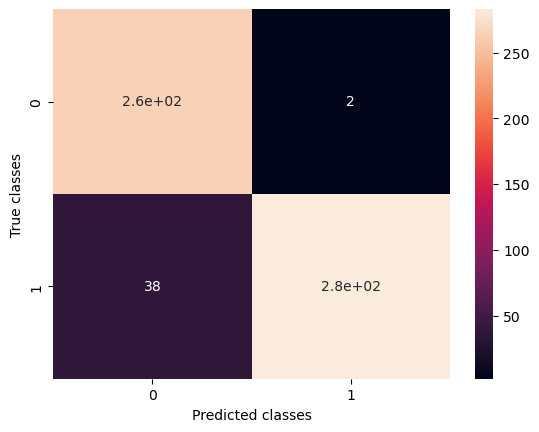

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.show()